![](ML-Diagram.png)

<font color='grey'>
    
### Major Machine Learning Algorithms: 
    
2. **Classification**

    We use classification algorithms for predicting a set of items’ class or category.

    Classification algorithms:
    * K-Nearest Neighbors
    * Decision Trees
    * Random Forest
    * Support Vector Machine
    * Naive Bayes
    
    
</font>

<font color='grey'>

### Getting Started with K-Nearest Neighbors Algorithm

The KNN algorithm is very simple and very effective. It is widely applied in areas like finance, political science, handwriting detection, and image recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. It is used for solving both classification and regression problems.
    
KNN is best shown through an example! Imagine we had some imaginary data on dogs and horses with heights and weights. If we plot them out we have something like this…

<img src='KNN.png'>
    
The red points indicate the horse and the blue points dog. What we want to know is if we get a new animal(new data point) that we only know its height and weight, can we be able to classify it as a dog or a horse? Based on where the green points lie and its association with the neighboring points it's kinda easy to predict what it is.

For instance, the top most point would probably be a horse since all the points around it are red for a horse. Likewise, the point on the bottom left will be a dog. The middle point will depend on the number of neighbors you choose to consider. let’s see how you choose k as choosing a K will affect what class a new data point will be assigned to. Consider the case below.
    
<img src='KNN1.png'>
    
Here training data has been plotted which are yellow points for class A and purple points for class B. The red star indicates a new data point. We want to predict whether this point belongs to class A or class B. If we choose K is equal to 3 then we will look at the three nearest neighbors to this new point and obviously predict the point belongs to class B. However, if we set K is equal to six we will have a majority of yellow points and end up predicting the new point belongs to class A. The number of neighbors is the core deciding factor. You can think of K as a controlling variable for the prediction model.
    
The model representation for KNN is the entire training dataset. Simple right? Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression problems, this might be the mean output variable, for classification problems this might be the mode (or most common) class value.
    
The trick is in how to determine the similarity between the data instances. The simplest technique if your attributes are all of the same scale (all in meters for example) is to use distance measures such as the Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance a number you can calculate directly based on the differences between each input variable.
    
**Pros**
* It’s very simple.
* Works with any number of classes.
* You can update and curate your training instances over time to keep predictions accurate.
* Few parameters are required. Most of the time its K and the distance metrics making turning the parameters easy.

**Cons**
* The idea of distance or closeness can break down in very high dimensions (lots of input variables) which can negatively affect the performance of the algorithm on your problem. This is called the curse of dimensionality. It suggests you only use those input variables that are most relevant to predicting the output variable.

    
    
### Fully Explained K-Nearest Neighbors with Python

>*The main goal is to predict the new data point based on samples near that data point. These sample points can be based on k-value or radius-based. The k value is defined by the user and the radius is base on the density of data points.*
    
>*To measure the distance between the new point and samples point near it is based on Euclidean distance or by Manhattan distance the former one is mostly used. Well, there are many distance metrics used to measure the distance like Chebyshev, Minkowski is in vector space with real values.*
    
>*There are many other distance metrics also as shown below:*
    
>* Haversine: used when there are radian values on input and output.
>* Hamming: It is used to calculate the equal length in the binary string.
>* Jaccard: It is based on the similarity point between two groups.
    
>*Talking about the different distances because they play important role in many learning algorithms in classification and clustering. A good distance metric always speeds up the time that good for good performance optimization.*

>*The algorithm takes some type of searching in the machine learning as shown below:*
    
>* **Brute Force search:** It is used for fast searching of the nearest neighbor. It is good small data set and not feasible when the data set grows.*
    
>* **K-D Tree:** It comes to overcome the problem of brute force. This is based on tree type structured and the distance searching is based on the association. If X is far from Y and Z is near to Y then Z is also far to X. So, to make the fast search optimization is done in this tree. But when the neighbor points grow after a limit value then is not feasible too.*
    
>* **Ball Tree:** It is developed to overcome the more neighbor dimension problem in the KD tree. It constructs a nested hyper-spherical geometry that useful in high dimensions.*
    
>*In the case of regression in k neighbor, the data should be in continuous form. A weight parameter is used to assigned as uniform or distance to make the prediction line.*
    
>*Choosing the right value to K is also important and it can be chosen by the error rate graph, the value with less error will be the optimized k value.*

>*Implementing the KNN algorithm with python.*
</font>

####  Import all required libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data

In [199]:
data = pd.read_csv('Classified_data.csv',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<font color='grey' type='Arial'>

### Preprocessing: Standardizing the Values

>*We want our features to be unit-independent, that is, not reliant on the scale of the measurement involved: for example, you could have a measured feature expressed in meters and I could have the same feature expressed in centimeters. If we both scale our respective data, this feature will be the same for each of us. Also, our predictor variables may have significantly different ranges and, in certain situations, such as when implementing KNN, this needs to be mitigated so that certain features do not dominate the algorithm.*
    
#### Standardizing the variables
    
        Here we import the StandardScaler and instantiate it to a variable scaler. Next, we use the fit_transform method to fit our data (without the target class) then transform it. Lastly, we create a new DataFrame with the scaled features and we take columns from our original df. We use slicing to take all the column names without the last one ‘TARGET CLASS’.
</font>

In [200]:
# Before modeling the model, we need to scale the data because of the variation of low and high values.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [201]:
# Droping the target variable with asix=1 as column and the independent features.

#transform the data
scaled_features = scaler.fit_transform(data.drop('TARGET CLASS',axis=1))

In [202]:
# Now, making a variable to save all the independent features in it.

df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


#### The Train Test Split

    We do not want to use all the data to train our model so that we can have some to measure the performance of our model. If we train our model on a dataset D, reporting the accuracy of the model on the same data D may make it look as though it performs better than it actually does. This is known as overfitting. To deal with this issue, we will train the model on a subset of the data, called the training set and evaluate its performance on the rest of the data, the testing set. This is precisely what we’re going to do here! We will use approximately 70% of the scaled data for training and 30% for testing.


In [203]:
# Now we will divide the data into train and test set.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,data['TARGET CLASS'],test_size=0.30)

<font color='grey'>

### The Building of the KNN Model

>*We are now going to build our model. we instantiate the KNeighborsClassifier to a variable knn. We pass n_neighbors as an argument with 1 neighbor as our starting point. Distance metrics can also be specified but we will go with the default one Minkowski. Other values include hamming and manhattan etc. n-jobs is for the number of parallel jobs to run for neighbors' search. None means 1 and -1 means using all processors. We then fit our model with the training data.*
    
**Building our KNN Model**
</font>

In [204]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predictions & Model Evaluation

    Here we are going to predict the test data set that was previously split and compare these predictions to the ground truth in order to get a measure of model performance

In [205]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
accuracy_score(y_test,pred)

0.9166666666666666

#### Choosing a K Value

    We are going to use the Elbow method to choose an optimal value for k. We start with an empty list to hold our error rate. Then we have a loop that we will allow us to train the knn model 39 times with the value of k being values 1 to 39. We will end up with 39 knn models. You can choose a lower number of models if you want to, there is no rule here. Our error rate is going to be the averages of where the predicted values are not equal to the actual test value.

In [206]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

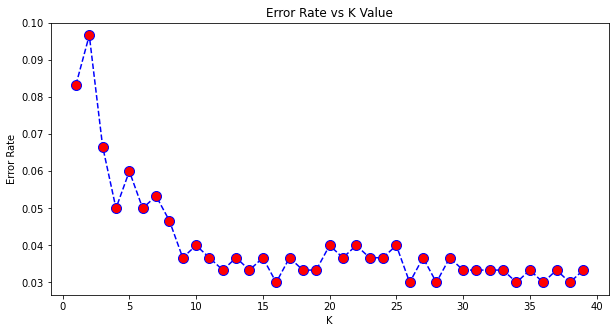

In [207]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,c='blue',ls='--',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


    It looks like we started with a high error rate when we went with a lower value of k and eventually going up and down we start to lower our error rate. For other data sets, this may be a little smoother. The reason why our plot looks bumpy is because the error rate is already very low. I will go with k is equal to 12 as the optimal value and see the accuracy score I get. We build the model again below.

In [208]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,pred))

Accuracy Score: 0.9666666666666667


<font color='grey'>

### Decision Trees in Machine Learning (ML)

**Table of Contents**

1. What is a Decision Tree?
2. Decision Tree Example
3. Building a Decision Tree
4. Node Impurity
5. Entropy
6. Gini
7. Overfitting in Decision Tree Learning
8. Pruning
9. Advantages and Disadvantages of Decision-tree-based Classification
10.Code Implementation
11.Advanced Decision Trees
12.Conclusion
13.Resources
14.References

### What is a Decision Tree?

A decision tree is a vital and popular tool for classification and prediction problems in machine learning, statistics, data mining, and machine learning [4]. It describes rules that can be interpreted by humans and applied in a knowledge system such as databases. Fundamentally, a decision tree T encodes d (a classifier or regression function) in the form of a tree structure which presents the following attributes:

* Decision node: It defines a test on a single attribute.
* Leaf node: It shows the value of the target attribute.
* Edge: It is a split of one attribute.
* Path: It is a disjunction of the test to make the final decision.

These are other names that decision trees are known as:

* Tree classifier.
* Divide and conquer strategy.
* Hierarchical classifier.
* Multistage classifier.

It classifies cases by commencing at the tree’s root and passing through it unto a leaf node.
    
<img src='Decission tree.png'>
    
A decision tree uses nodes and leaves to make a decision.
    
<img src='vector classification.png'>

Representation of the classification above in the form of a decision tree:
    
<img src='DT-Classification.png'>
    
### Decision Tree Example
    
**Problem Statement**
Predict the result of the basketball game between two different teams — team1 and team2.
    
**List of Usable Knowledge or Attributes related to the Game**
    
* Did Peter play center or forward?
* What was the location of the game — home or away?
* What was the start time of the game?
* Was the opponent’s center tall or not?
    
**Historical Data**

<img src='Historical data.png'>

**Data for Prediction**
    
<img src='Data for the prediction.png'>
    
Therefore, based on figure 5, historical and prediction data:
    
* Generalize the learned rule to new data.
* It is a classification problem.
 
    
### Building a Decision Tree
    
Decision tree learning involves learning a sequence of if/else queries that get us to the “true” answer almost immediately. These questions are also called test. It searches over all possible tests and finds the one that is most instructive about the target variable.
    
#### How to grow a decision tree?
    
* The top node is also called the root, and it represents the whole dataset.
* A decision tree progressively splits the training set into smaller and smaller subsets.
* If the test is “true” — a point is assigned to the left node; otherwise, it is assigned to the right node.
* A leaf of a tree that contains data points and it shares the same target values is called pure [1].
* A prediction on a new data point is made by examining which region of the partition of the feature space the point lazes in and then predicting the majority target in that region [1].
    
>*from sklearn.tree import DecisionTreeClassifier*  
>*from sklearn.datasets import load_breast_cancer*
>*from sklearn.model_selection import train_test_splitcancer = load_breast_cancer()X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)*

<img src='accuracy.png'> 
    
* If we do not restrict a decision tree's depth, it can become arbitrarily deep and complex.
* As shown in figure 6, the accuracy on the training set is 100% — because the leaves are pure, the tree has grown deep enough to remember all the labels on the training data unquestionably.
* The tree can grow vast and such kinds of trees are hard to understand. Larger trees are typically less accurate than smaller trees [2].
    
Code implementation to create leaf of a decision tree (The leaf is created based on the ml_tasks — regression or classification):

        def create_leaf(data, ml_task):
        label_column = data[:, -1]

        if ml_task == "regression":
            leaf = np.mean(label_column)
        else:
            unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
            i = counts_unique_classes.argmax()
            leaf = unique_classes[i]

        return leaf

The main aim of a decision tree is to select appropriate features for splitting the tree into subparts. Then we apply an ID3 algorithm in the background during splitting.

### Node Impurity
Node impurity is the homogeneity within a node. A node is impure if cases have more than one value for the response. A node is pure if all instances have the same value for the response or target variable or impurity = 0.
    
These are the two most popular methods for measuring node impurity:

* Entropy.
* Gini.
    
The best split is selected based on the degree of impurity of the child nodes. Node impurity is 0 when all patterns at the node are of the same category. Impurity becomes maximum when all the classes at node N are equally likely.

Code snippet to check for purity:
    
    
        def check_purity(data):
        label_column = data[:, -1]
        unique_classes = np.unique(label_column)

        if len(unique_classes) == 1:
            return True
        else:
            return False
    
### Entropy
In a decision tree, entropy is a kind of disorder or uncertainty. It is the measure of impurity, disorder, or uncertainty in a bunch of data. It is a way to control the split of data decided by a decision tree. It influences how a decision tree forms its boundaries. We use entropy to measure the impurity or randomness of a dataset.

Given the equation of entropy shown below:    
    
<img src='Equation of Entropy.png'>

Code snippet to calculate entropy:
    
        def get_entropy(data):
        label_col = data[:, -1]
        a, counts = np.unique(label_col, return_counts=True)
        prob = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))

        return entropy

A simple example of entropy:
    
Let’s say there is a bag which depicts two different scenarios:
    
* Bag A has 100 green balls. Peter wants to choose a green ball from this bag. Here, Bag A has 0 entropy because it implies 0 impurities or total purity.

* We replace 40 green balls in bag A with red balls, and similarly, we replace 10 green balls with black balls. Now, John wants to choose a green ball from this bag. In this case, the probability of drawing a green ball will drop down from 1.0 to 0.5 due to the increase in the bag's impurity.
    
**Shannon’s entropy** model uses the logarithm function with base 2 (log2(P(x)) to measure the entropy.
    
**Shannon’s Information Theory**
    
There are only two classes — Yes, No.
    
In our example, t is a set of messages sent to a receiver that must guess their class so:
    
* If p(Yes | t) = 1 (resp., p(No | t) = 1), then the receiver guesses a new example as yes. No message needs to send.
    
* If p(Yes | t) = p (No | t) = 0.5, then the receiver cannot guess, and we must tell them the class of a new example, sending a one-bit message.
    
* If 0<p(Yes | t) < 1, then the receiver needs less than one-bit on average to know the class of a new example.

**Information Gain**
    
Information Gain measures how much information a feature provides about the class.
Information Gain is significant in a Decision tree due to the points below:
    
* It is the primary key accepted by the Decision tree algorithm to build a Decision tree.
    
* The Decision Tree will evermore try to maximize information gain.
    
* The attribute which has the highest information gain will be tested or split first.
    
The figure below shows the equation for Information Gain:

<img src='The equation of information gain..png'>
    
**Example of Entropy Calculation**
    
There is a road to drive vehicles, and that road has multiple features like grade, bumpiness, speed limit, and others.
    
This is the dataset:

<img src='Road dataset.png'>
    
**Features:**
    
* Condition
    
* Bumpiness
    
* Speed Limit
    
**Label:**
    
* Speed
    
Total number of observations: 4
    
**Calculate the entropy of Grade Feature:**
    
Take labels as a parent node like SSFF → Slow Slow Fast Fast.
    
The entropy of SSFF:
    
P(Slow) = 2/4 = 0.5
    
P(Fast) = 2/4 = 0.5
    
So, the entropy of SSFF:
    
The entropy of parent = {0.5 log2(0.5) + 0.5 log2(0.5)} = -{-0.5 + (-0.5)}
    
Hence, The entropy of parent = 1
    
Next, to find the grade feature's information gain, split the parent node by the grade feature, as shown in figure 10.   
<img src='The split of the parent node by the grade feature.png'>
 
Calculate the entropy of both (left and right) children node SSF and F, respectively.
    
The entropy of **node F** = 0 (Note: 0 because all are from the same class)
    
The entropy of **node SSF**:
    
P(Slow) = 2/3 = 0.334
    
P(Fast) = 1/3 = 0.334
    
So, Entropy of node SSF = -{0.667 log2 (0.667) + 0.334 log2(0.334)}
    
= -{-0.38 + (-0.52)} = 0.9
    
<img src='Number of nodes in the parent node and children nodes.png'>  
<img src='The equation to calculate the entropy of the children nodes.png'>
<img src='The entropy of the child node with a weighted average.png'>
    
The information gain of grade from the equation = 1–0.675 = 0.325
    
The range of entropy lies between 0 to 1.
    
### Gini
    
Like entropy, the Gini index is also a type of criterion in decision trees that serves to calculate information gain. Information gain is used by the decision tree to split a node. Gini measures the impurity of a node.
    
The range of Gini lies between 0 to 0.5. Gini impurity is better compared to entropy for selecting the best features [3].
    
The equation of the Gini index to measure impurity:
<img src='Equation of Gini.png'>
 
The split criterion in Gini index:
    
* It assumes that there exist several possible split values for each attribute.
    
* All attributes are assumed continuous-valued
    
* It can be modified for the categorical attributes.
    
### Overfitting in Decision Tree Learning
    
Overfitting is a severe problem in machine learning that leads to the worst performance issue in the model. Similarly, the decision tree can also face the problem of overfitting due to the issues below:

* If the decision tree grows too far.
    
* If the number of instances in the decision tree gets smaller as the tree is built.
    
We use pruning to avoid overfitting in decision trees.
    
### Pruning
    
Pruning is the process of adjusting the decision tree to minimize misclassification errors. It is the inverse of splitting.
    
There are two ways to perform Pruning:
    
* Pre-pruning.
    
* Post-pruning.
    
It Identifies and removes branches that reflect noise or outliers.
    
**Complete Tree**
    
A complete tree indicates the stopping pattern for the tree. It follows the steps below:
    
* If all the records belong to the same class, then stop expanding a node.
    
* If all the records have the same attribute values, then stop expanding a node.
    
**Pre-pruning**
    
In the pre-pruning approach, the tree does not grow entirely. It follows the early stopping rule. It follows the below steps:
    
* Stops the algorithm before it becomes a fully-grown tree.
    
* Stops if all instances belong to the same class.
    
* Stops if all attribute values are the same.
    
**Post-pruning**
    
Post-pruning is the most popular approach in the decision tree to avoid overfitting. It essentially solves the issue of overfitting by following the below steps:
    
* Completly grow the decision tree.
    
* Follow the bottom-up approach to trim the nodes of the decision tree.
    
* If the error of generalization improves after the trimming of nodes, replace the sub-tree with a leaf node.
    
* In a sub-tree, the class label of the leaf node is determined by the majority class.
    
### Advantages and Disadvantages of Decision-tree-based Classification
    
These are the advantages and disadvantages of decision-tree-based classification:

**Advantages**
    
* It is very cheap to build.
    
* It gives outstanding accuracy.
    
* It is very fast in the classification of “unknown” records.
    
* It is straightforward to interpret for the small-sized trees.
    
* It can handle both continuous and symbolic attributes.
    
* It has an acceptable performance on noisy data.
    
    
**Disadvantages**
    
* There can be a system memory issue because data needs to fit in the memory.
    
* It requires to retrain if new data comes.
    
* It has the problem of axis-parallel decision boundaries.
    
### Code Implementation
    
For this example, we will be using the Iris dataset. Here we show the code implementation of a decision tree step by step:
    
**Import necessary libraries:**
    
</font>

In [36]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

#### Read IRIS dataset:

In [37]:
data = pd.read_csv('Iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
data.shape

(150, 5)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
# Get Counts

data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [41]:
# Get Target columns

target_col = data['species']

In [42]:
# Get the value of X and y

X = data.drop(['species'],axis=1)
y = data['species']

In [43]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [44]:
# split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
# Decission Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [46]:
# Apply decision tree classification with Gini index:

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [47]:
# FIT THE MODEL

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [48]:
# Prediction
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [49]:
# Get accuracy with criterion Gini index:

from sklearn.metrics import accuracy_score
print("Model accuracy: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy: 0.9800


In [50]:
# Check for overfitting and underfitting:

print('Training Set Score:{:.2f}'.format(clf_gini.score(X_train,y_train)))
print('Test Set Score:{:.2f}'.format(clf_gini.score(X_test,y_test)))


Training Set Score:0.97
Test Set Score:0.98


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(418.5, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

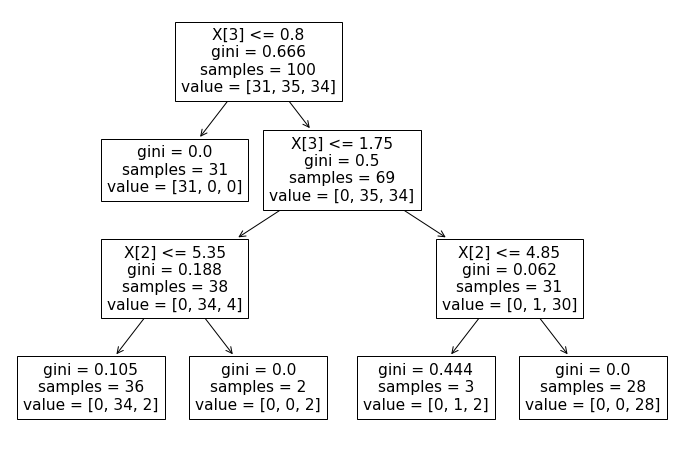

In [51]:
# Plot Decission tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

### Advanced Decision Trees

    There is another crucial improvement made for the decision trees, which is Random forests. These are similar to decision trees but require multiple trees together hence the name forests. Random forests ensemble a supervised learning technique used in machine learning. There are more chances of overfitting in a single decision tree, but with multiple trees together, the training error is minimal as the tree grows deeper and deeper.
    
### Conclusion

    Decision trees are widely used and are one of the most used methods used in predictive modeling. They help predict the future and are very easy to understand. They work more efficiently with discrete attributes, but there are high chances that these trees suffer from error propagation.
    
    Decision trees are also not sensitive to outliers because the partitioning happens based on the proportion of samples within the split ranges and not on absolute values [5]. They are quite intuitive and easy to explain to non-technical users.
    
    Another critical practice for a decision tree is that those non-linear relationships between the parameters do not affect the tree’s performance. Consequently, in decision trees, predictions are faster on high dimensional data.

### Example # 2

In [74]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [75]:
data = pd.read_csv('balance-scale.data',sep= ',', header = None)

data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [76]:
data.shape

(625, 5)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [78]:
# Get the value of X and y

X = data.drop([0],axis=1)
y = data[0]

X,y

(     1  2  3  4
 0    1  1  1  1
 1    1  1  1  2
 2    1  1  1  3
 3    1  1  1  4
 4    1  1  1  5
 ..  .. .. .. ..
 620  5  5  5  1
 621  5  5  5  2
 622  5  5  5  3
 623  5  5  5  4
 624  5  5  5  5
 
 [625 rows x 4 columns],
 0      B
 1      R
 2      R
 3      R
 4      R
       ..
 620    L
 621    L
 622    L
 623    L
 624    B
 Name: 0, Length: 625, dtype: object)

In [79]:
# split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [80]:
# Decission Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [81]:
# Apply decision tree classification with Gini index:

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=100,min_samples_leaf=5)

In [82]:
# FIT THE MODEL

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [83]:
# Prediction
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

In [84]:
# Get accuracy with criterion Gini index:

from sklearn.metrics import accuracy_score
print("Model accuracy: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy: 0.7340


In [85]:
# Confustion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix:', confusion_matrix(y_test,y_pred_gini))

Confusion matrix: [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]


In [89]:
# Classification Report

from sklearn.metrics import classification_report
print('classification_report:', classification_report(y_test,y_pred_gini))

classification_report:               precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# Check for overfitting and underfitting:

print('Training Set Score:{:.2f}'.format(clf_gini.score(X_train,y_train)))
print('Test Set Score:{:.2f}'.format(clf_gini.score(X_test,y_test)))

Training Set Score:0.77
Test Set Score:0.73


[Text(334.8, 380.52, 'X[2] <= 2.5\ngini = 0.572\nsamples = 437\nvalue = [36, 203, 198]'),
 Text(167.4, 271.8, 'X[1] <= 1.5\ngini = 0.446\nsamples = 165\nvalue = [13, 117, 35]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.532\nsamples = 27\nvalue = [4, 6, 17]'),
 Text(41.85, 54.360000000000014, 'gini = 0.653\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.124\nsamples = 15\nvalue = [0, 1, 14]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.332\nsamples = 138\nvalue = [9, 111, 18]'),
 Text(209.25, 54.360000000000014, 'gini = 0.637\nsamples = 25\nvalue = [5, 9, 11]'),
 Text(292.95, 54.360000000000014, 'gini = 0.18\nsamples = 113\nvalue = [4, 102, 7]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.534\nsamples = 272\nvalue = [23, 86, 163]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.559\nsamples = 110\nvalue = [11, 62, 37]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.37\ns

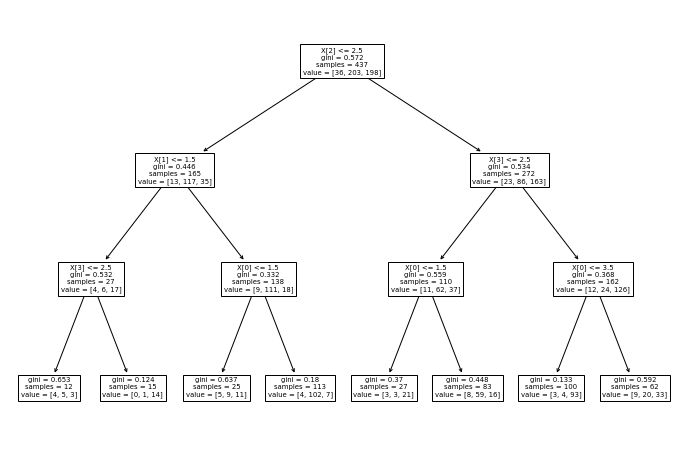

In [88]:
# Plot Decission tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

<font color='grey'>
             
### Use of Decision Trees and Random Forest in Machine Learning

Tree-based learning algorithms are one of the most commonly used supervised learning methods. They empower predictive models with high accuracy, stability, ease of interpretation, and are adaptable at solving any classification or regression problem.
    
Decision Tree predicts the values of responses by learning decision rules derived from features. In a tree structure for classification, the root node represents the entire population, while decision nodes represent the particular point where the decision tree decides on which specific feature to split on. The purity for each feature will be assessed before and after the split. The decision tree will then decide to split on a specific feature that produces the purest leaf nodes (ie. terminal nodes at each branch).

<img src='A simple diagram of a decision tree.png'>

A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis.
    
However, a decision tree has its own limitations. The reproducibility of the decision tree model is highly sensitive, as a small change in the data can result in a large change in the tree structure. Space and time complexity of the decision tree model is relatively higher, leading to longer model training time. A single decision tree is often a weak learner, hence a bunch of decision tree (known as random forest) is required for better prediction.
    
The random forest is a more powerful model that takes the idea of a single decision tree and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Thus giving the advantage of obtaining a more accurate and stable prediction.
    
Each tree is trained on a random set of observations, and for each split of a node, only a random subset of the features is used for making a split. When making predictions, the random forest does not suffer from overfitting as it averages the predictions for each of the individual decision trees, for each data point, in order to arrive at a final classification. 
    
    
<img src='A depiction of the random forest.png'>    

We shall approach a classification problem and explore the basics of how decision trees work, how individual decisions trees are combined to form a random forest, how to fine-tune the hyper-parameters to optimize random forest, and ultimately discover the strengths of using random forests.

### Problem Statement: To predict whether a person makes more than U$50,000 per year.

</font>
             

In [90]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
data = pd.read_csv('adult.data',sep=',',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
# Add Headers to dataframe

headers = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

data.columns=headers
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Cleaning

In [98]:
# Check for empty cells and if data types are correct for the respective columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:>

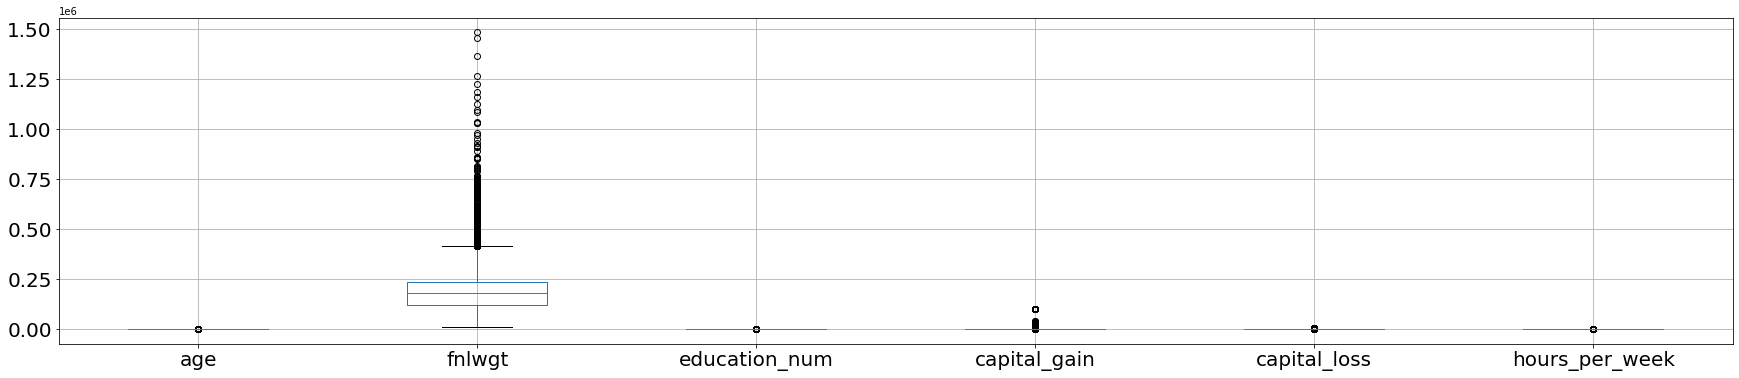

In [99]:
# Use box plot to detect any outliers

data.boxplot(figsize=(30,6),fontsize=20)

In [100]:
# Drop fnlwgt column

clean_df = data.drop(['fnlwgt'],axis=1)
clean_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [102]:
# Select duplicate rows except first occurrence based on all columns
dup_rows = clean_df[clean_df.duplicated()]
dup_rows

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
352,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
391,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
563,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
570,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
673,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


>* An example of duplicates can be seen in the above rows with the entries “Private” under the “workclass” column. These duplicate rows correspond to samples for different surveyed individuals instead of genuine duplicate rows. As such, we would not remove any duplicated rows to preserve the data for further analysis.*

### Label Encoding

    Categorical features are encoded into numerical values using label encoding, to convert each class under the specified feature to a numerical value.

In [106]:
# categorical boolean mask

categorical_feature_mask = clean_df.dtypes == object # it will covert all numeric values to False and string data to True

# Filter categorical columns using mask and turn it into a list
categorical_cols = clean_df.columns[categorical_feature_mask].tolist()

# Instantiate labelencoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoder on categorical feature columns
clean_df[categorical_cols] = clean_df[categorical_cols].apply(lambda col: le.fit_transform(col))
clean_df[categorical_cols].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [112]:
X = clean_df.iloc[:,1:13]   # Independent columns - features
y = clean_df.iloc[:,-1]   # targeted column - income

# Distribution of target variable
print(clean_df["income"].value_counts())

0    24720
1     7841
Name: income, dtype: int64


In [113]:
print(clean_df["income"].value_counts(normalize=True))
# 0 for label: <= U$50K
# 1 for label: > U$50K

0    0.75919
1    0.24081
Name: income, dtype: float64


In [114]:
X

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,7,9,13,4,1,1,4,1,2174,0,40,39
1,6,9,13,2,4,0,4,1,0,0,13,39
2,4,11,9,0,6,1,4,1,0,0,40,39
3,4,1,7,2,6,0,2,1,0,0,40,39
4,4,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,12,2,13,5,4,0,0,0,38,39
32557,4,11,9,2,7,0,4,1,0,0,40,39
32558,4,11,9,6,1,4,4,0,0,0,40,39
32559,4,11,9,4,1,3,4,1,0,0,20,39


    An imbalanced dataset was observed from the above-normalized distribution.
<font color='grey'>
    
### Design of Experiment

It would be interesting to see how different factors can affect the performance of each classifier. Let’s consider the following 3 factors:
    
<img src='Design Experiment.png'>

* Number of features: When deciding on the number of features to use for a particular dataset, The Elements of Statistical Learning (section 15.3) states that:

>* Typically, for a classification problem with p features, √p features are used in each split.

Thus, we would perform feature selection to choose the top 4 features for the modeling of the optimized random forest. With the ideal number of features, it would help to prevent overfitting and improve model interpretability.

* **Upsampling:** An imbalanced dataset would lead to a biased model after training. For this particular dataset, we see a distribution of 76% representing the majority class (ie. income <=U$50K) and the remaining 24%  representing the minority class (ie. income >U$50K)

Upon training of the models, we will have the decision tree and random forest achieving a high classification accuracy belonging to the majority class. To overcome this, we would perform an upsampling of the minority class (ie. income >U$50K) to create a balanced dataset for the optimized random forest model.

* **Grid search:** In order to maximize the performance of the random forest, we can perform a grid search for the best hyperparameters and optimize the random forest model.

</font>